# Capstone Project

In this project, I am using public traffic collision data from the French government.
3 files are involved, describing:
- the people involved in the collision (age, gender, route type)
- the  conditions surrounding the collision  (weather, road status, light conditions)
- information on the location where the collision took place (road type, traffic pattern)

We will be retaining the following predictors:
- light: <br/>
    1- Daylight <br/>
    2- Dusk <br/>
    3- Night with no public lights <br/>
    4- Night with public lights turned off <br/>
    5- Night with public lights turned on <br/>
- weather:  <br/>
    1- Normal <br/>
    2- Light rain <br/>
    3- Heavy rain <br/>
    4- Snow or hail <br/>
    5- Fog or smoke <br/>
    6- Strong wind / Storm <br/>
    7- Very sunny <br/>
    8- Overcast <br/>
    9- Other <br/>
- severity <br/>
    1- No injury <br/>
    2- Death <br/>
    3- Serious injuries <br/>
    4- Light injuries <br/>
- Road type <br/>
    1- Highway <br/>
    2- National road <br/>
    3- Departmental road <br/>
    4- Town road <br/>
    5- Non-public road <br/>
    6- Parking lot <br/>
    9- Other <br/>
- traffic pattern <br/>
    1- One way <br/>
    2- Two way, no divider <br/>
    3- Two way, with divider <br/>
    4- Alternate circulation lanes <br/>
- surface conditions <br/>
    1- dry <br/>
    2- wet <br/>
    3- puddles <br/>
    4- flooded <br/>
    5- snowy <br/>
    6- muddy <br/>
    7- icy <br/>
    8- oily <br/>
    9- other <br/>
- person type <br/>
    1- driver <br/>
    2- passenger <br/>
    3- pedestrian <br/>
    4- other <br/>
- sex <br/>
    1- male <br/>
    2- female <br/>
- birth year <br/>
- route <br/>
    1- work commute <br/>
    2- Home - school <br/>
    3- Shopping <br/>
    4- Work usage <br/>
    5- Leisure <br/>
    9- Other <br/>
    




Let's import all the libraries we'll need for this project

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

Let's get the data. There are 3 different files, which we will merge on the Num_Acc key (collision ID).

In [3]:
#Click here and press Shift+Enter
!wget -O data.csv https://www.data.gouv.fr/en/datasets/r/6eee0852-cbd7-447e-bd70-37c433029405

--2020-10-22 17:56:03--  https://www.data.gouv.fr/en/datasets/r/6eee0852-cbd7-447e-bd70-37c433029405
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-111741/caracteristiques-2018.csv [following]
--2020-10-22 17:56:04--  https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-111741/caracteristiques-2018.csv
Resolving static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connecting to static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4638375 (4.4M) [text/csv]
Saving to: ‘data.csv’

100%[======================================>] 4,638,375   4.83MB/s   in 0.9s   

2020-10-22 17:56:07 (4.83 MB/s) - ‘data.csv’ save

In [4]:
df_data = pd.read_csv("data.csv",encoding='latin-1')
df_data.shape

(57783, 16)

In [5]:
df_data.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590


Let's get the driver data:

In [6]:
!wget -O drivers.csv https://www.data.gouv.fr/en/datasets/r/72b251e1-d5e1-4c46-a1c2-c65f1b26549a

--2020-10-22 17:56:08--  https://www.data.gouv.fr/en/datasets/r/72b251e1-d5e1-4c46-a1c2-c65f1b26549a
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112100/usagers-2018.csv [following]
--2020-10-22 17:56:09--  https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112100/usagers-2018.csv
Resolving static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connecting to static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5273810 (5.0M) [text/csv]
Saving to: ‘drivers.csv’

100%[======================================>] 5,273,810   6.18MB/s   in 0.8s   

2020-10-22 17:56:11 (6.18 MB/s) - ‘drivers.csv’ saved [5273810/5

In [7]:
df_drivers = pd.read_csv("drivers.csv",encoding='latin-1')
df_drivers.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01


Let's see the  severity breakdown:

In [8]:
df_drivers['grav'].value_counts()

1    54248
4    50360
3    22169
2     3392
Name: grav, dtype: int64

We see that the serious collisions (code 2 & 3) are fewer than the non-serious ones. As we want to predict collisions, we will need to balance the dataset later on.

Let's merge the first 2 files:

In [9]:
df=pd.merge(df_drivers,df_data,on='Num_Acc',how='outer')
#df_drivers.join(df_data,on='Num_Acc',lsuffix='_left', rsuffix='_right')

In [10]:
df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,...,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,...,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,...,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,...,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,...,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,...,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590


In [11]:
!wget -O locations.csv https://www.data.gouv.fr/en/datasets/r/d9d65ca1-16a3-4ea3-b7c8-2412c92b69d9

--2020-10-22 17:56:12--  https://www.data.gouv.fr/en/datasets/r/d9d65ca1-16a3-4ea3-b7c8-2412c92b69d9
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112036/lieux-2018.csv [following]
--2020-10-22 17:56:13--  https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112036/lieux-2018.csv
Resolving static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connecting to static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781213 (2.7M) [text/csv]
Saving to: ‘locations.csv’

100%[======================================>] 2,781,213   3.72MB/s   in 0.7s   

2020-10-22 17:56:15 (3.72 MB/s) - ‘locations.csv’ saved [2781213/2

In [108]:
df_locations = pd.read_csv("locations.csv",encoding='latin-1')
df_locations.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


In [109]:
df=pd.merge(df,df_locations,on='Num_Acc',how='outer')
#df_drivers.join(df_data,on='Num_Acc',lsuffix='_left', rsuffix='_right')

In [110]:
df.shape

(130169, 44)

In [133]:
data=df[['Num_Acc','lum','atm','grav','catr','surf','catu','sexe','an_nais','trajet','circ']]
data.head()

,Num_Acc,lum,atm,grav,catr,surf,catu,sexe,an_nais,trajet,circ
0,201800000001,1,1.0,3,3,1.0,1,1,1928.0,0.0,2.0
1,201800000001,1,1.0,1,3,1.0,1,1,1960.0,5.0,2.0
2,201800000002,1,7.0,1,4,1.0,1,1,1947.0,0.0,2.0
3,201800000002,1,7.0,4,4,1.0,3,1,1959.0,0.0,2.0
4,201800000003,1,1.0,3,3,1.0,1,1,1987.0,5.0,2.0


In [134]:
print(data.columns)

Index(['Num_Acc', 'lum', 'atm', 'grav', 'catr', 'surf', 'catu', 'sexe',
       'an_nais', 'trajet', 'circ'],
      dtype='object')


Let's rename the columns for clarity:

In [135]:
data.columns=['Num_Acc','light','weather','severity','road_type','road_condition','driver_type','sex','birth_year','route_type','traffic_pattern']

In [136]:
data.head()

,Num_Acc,light,weather,severity,road_type,road_condition,driver_type,sex,birth_year,route_type,traffic_pattern
0,201800000001,1,1.0,3,3,1.0,1,1,1928.0,0.0,2.0
1,201800000001,1,1.0,1,3,1.0,1,1,1960.0,5.0,2.0
2,201800000002,1,7.0,1,4,1.0,1,1,1947.0,0.0,2.0
3,201800000002,1,7.0,4,4,1.0,3,1,1959.0,0.0,2.0
4,201800000003,1,1.0,3,3,1.0,1,1,1987.0,5.0,2.0


Let's look at  the light breakdown:

In [137]:
data['light'].value_counts()

1    87798
5    19777
3    12783
2     8584
4     1227
Name: light, dtype: int64

In [116]:
df1=pd.crosstab(data.severity,data.light,normalize='index')

del df1[4]
df1.head()

light,1,2,3,5
severity,,,,
1,0.697574,0.065551,0.079948,0.148300
2,0.577535,0.073408,0.246167,0.091392
3,0.651856,0.070008,0.138301,0.130498
4,0.666124,0.064079,0.090250,0.169361


In [117]:
df2=pd.crosstab(data.severity,data.light)
df2

light,1,2,3,4,5
severity,,,,,
1,37842,3556,4337,468,8045
2,1959,249,835,39,310
3,14451,1552,3066,207,2893
4,33546,3227,4545,513,8529


In [118]:
df1.rename(columns={1:'Daylight',2:'Dusk',3:'Night, no public light',5:'Night, public lights on'},
           index={1:'No injury',2:'Death',3:'Severe injuries', 4:'Light injuries'},inplace=True)


In [119]:
df1.head()

light,Daylight,Dusk,"Night, no public light","Night, public lights on"
severity,,,,
No injury,0.697574,0.065551,0.079948,0.148300
Death,0.577535,0.073408,0.246167,0.091392
Severe injuries,0.651856,0.070008,0.138301,0.130498
Light injuries,0.666124,0.064079,0.090250,0.169361


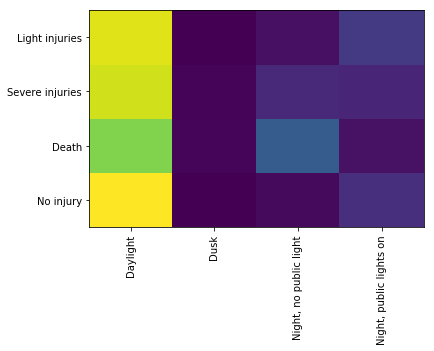

In [120]:
import matplotlib.pyplot as plt

plt.pcolor(df1)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns,rotation='vertical')
plt.show()

In [138]:
data_unique=data.drop_duplicates(['Num_Acc'])

In [139]:
df3=pd.crosstab(data_unique.weather,data_unique.road_condition)
df3

road_condition,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
weather,,,,,,,,,,
1.0,296,42856,1875,16,4,9,17,69,84,268
2.0,28,409,5791,31,7,0,4,15,18,4
3.0,4,40,1199,35,38,1,1,1,4,0
4.0,0,14,137,0,3,139,0,59,0,3
5.0,0,211,187,0,0,0,1,18,3,4
6.0,0,71,42,1,0,2,0,0,0,0
7.0,4,976,22,0,0,1,1,0,3,4
8.0,21,1069,872,5,1,5,4,18,12,14
9.0,5,79,122,2,0,1,0,64,1,15


In [140]:
df3=df3.drop(columns=[0,3,4,5,6,7,8,9],axis=1)
df3

road_condition,1.0,2.0
weather,,
1.0,42856,1875
2.0,409,5791
3.0,40,1199
4.0,14,137
5.0,211,187
6.0,71,42
7.0,976,22
8.0,1069,872
9.0,79,122


In [141]:
df3.rename(columns={1:'Dry',2:'Wet'},
           index={1:'Normal',2:'Light Rain',3:'Heavy Rain', 4:'Snow or Hail',5:'Fog or Smoke',6:'Strong wind / Storm', 7:'Sunny', 8:'Overcast', 9:'Other'},inplace=True)


We can see that the amount of collisions in daylight is significantly lower for deadly collisions (severity=2), but similar for other severity levels.  We also see that 'no public  lights at night' amount for almost <b>a quarter</b> of deadly collisions.

In [142]:
data['road_condition'].value_counts()

1.0    103559
2.0     22760
0.0       729
9.0       557
7.0       492
5.0       386
8.0       233
3.0       216
4.0       159
6.0        52
Name: road_condition, dtype: int64

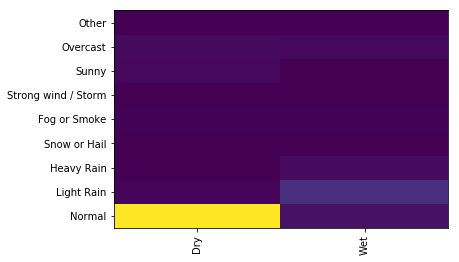

In [143]:
import matplotlib.pyplot as plt

plt.pcolor(df3)
plt.yticks(np.arange(0.5, len(df3.index), 1), df3.index)
plt.xticks(np.arange(0.5, len(df3.columns), 1), df3.columns,rotation='vertical')
plt.show()

We see that most collisions occur during dry and clement weather, with a dry road. This is counterintuitive, suggesting that collisions are due to lack of attention rather than underestimation of the risks caused by external conditions.

In [158]:
df4=pd.crosstab(data_unique.severity,data_unique.traffic_pattern,normalize='columns')
df4

traffic_pattern,0.0,1.0,2.0,3.0,4.0
severity,,,,,
1,0.514039,0.505318,0.439472,0.450063,0.481994
2,0.018719,0.009244,0.040003,0.021182,0.008310
3,0.124910,0.093430,0.212928,0.122310,0.157895
4,0.342333,0.392009,0.307597,0.406446,0.351801


In [159]:
del df4[0]
del df4[4]

In [160]:
df4.rename(columns={1:'One way',2:'2 way, no divider',3:'2-way, with divider'},
           index={1:'No injury',2:'Death',3:'Severe injuries', 4:'Light injuries'},inplace=True)
df4


traffic_pattern,One way,"2 way, no divider","2-way, with divider"
severity,,,
No injury,0.505318,0.439472,0.450063
Death,0.009244,0.040003,0.021182
Severe injuries,0.093430,0.212928,0.122310
Light injuries,0.392009,0.307597,0.406446


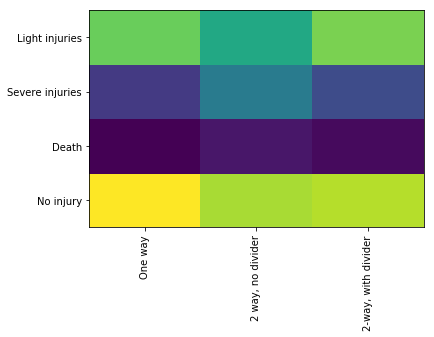

In [161]:
import matplotlib.pyplot as plt

plt.pcolor(df4)
plt.yticks(np.arange(0.5, len(df4.index), 1), df4.index)
plt.xticks(np.arange(0.5, len(df4.columns), 1), df4.columns,rotation='vertical')
plt.show()

Let's recode  the severity levels, and group 'deadly' and 'serious injury' together, which is what we would want to avoid as much as is possible.

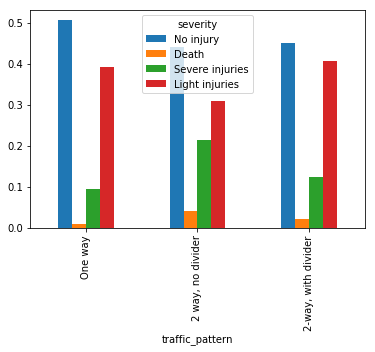

In [170]:
df5=df4.transpose()
df5.plot.bar()

In [25]:
data.loc[data.severity==1,'severity']=0
data.loc[data.severity==4,'severity']=0
data.loc[data.severity==2,'severity']=1
data.loc[data.severity==3,'severity']=1

In [26]:
data['severity'].head(10)

0    1
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: severity, dtype: int64

Let's remove the rows with empty values

In [27]:
data.dropna(subset=['light','weather','road_type','road_condition','driver_type','sex','birth_year','route_type','traffic_pattern'],inplace=True)

In [28]:
data['severity'].value_counts()

0    103646
1     25287
Name: severity, dtype: int64

We see that the dataset is imbalanced; we need  to remedy that.

In [29]:
g=data.groupby(['severity'])

In [30]:
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))


light  weather  severity  road_type  road_condition  \
severity                                                              
0        0          2      1.0         0          4             1.0   
         1          1      8.0         0          4             1.0   
         2          1      1.0         0          4             1.0   
         3          3      1.0         0          3             1.0   
         4          5      1.0         0          2             1.0   
         5          1      1.0         0          4             1.0   
         6          1      1.0         0          4             1.0   
         7          1      1.0         0          4             1.0   
         8          1      1.0         0          3             1.0   
         9          1      1.0         0          7             1.0   
         10         1      1.0         0          2             1.0   
         11         1      1.0         0          4             1.0   
         12         1      2.0         0          4             2.0   
         13         5      1.0         0          4             1.0   
         14         1      1.0         0          1             1.0   
         15         1      1.0         0          2             1.0   
         16         1      1.0         0          4             1.0   
         17         1      1.0         0          1             1.0   
         18         1      1.0         0          2             1.0   
         19         5      1.0         0          4             1.0   
         20         1      1.0         0          4             1.0   
         21         1      1.0         0          4             1.0   
         22         5      1.0         0          4             1.0   
         23         5      8.0         0          4             1.0   
         24         1      2.0         0          3             2.0   
         25         1      1.0         0          3             1.0   
         26         2      3.0         0          4             2.0   
         27         1      1.0         0          4             1.0   
         28         3      1.0         0          1             1.0   
         29         5      1.0         0          3             1.0   
...               ...      ...       ...        ...             ...   
1        25257      1      1.0         1          3             1.0   
         25258      1      1.0         1          9             1.0   
         25259      1      1.0         1          1             1.0   
         25260      1      1.0         1          3             1.0   
         25261      5      1.0         1          4             2.0   
         25262      3      1.0         1          3             1.0   
         25263      1      1.0         1          3             1.0   
         25264      3      1.0         1          3             1.0   
         25265      1      2.0         1          6             2.0   
         25266      1      1.0         1          2             1.0   
         25267      1      8.0         1          4             1.0   
         25268      2      1.0         1          4             1.0   
         25269      3      1.0         1          3             1.0   
         25270      1      1.0         1          4             1.0   
         25271      1      1.0         1          3             1.0   
         25272      1      5.0         1          3             1.0   
         25273      1      1.0         1          3             1.0   
         25274      1      1.0         1          3             1.0   
         25275      1      1.0         1          3             1.0   
         25276      1      1.0         1          3             2.0   
         25277      1      7.0         1          3             1.0   
         25278      5      1.0         1          3             1.0   
         25279      1      1.0         1          3             1.0   
         25280      1      1.0         1

In [31]:
data=g.head(50594)

Let's define the feature set:

In [32]:
X=np.asarray(data[['light','weather','road_type','road_condition','driver_type','sex','birth_year','route_type','traffic_pattern']])

In [33]:
y=np.asarray(data['severity'])
y[0:5]

array([1, 0, 0, 0, 1])

Let's standardize  the data now:

In [34]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.60050067, -0.37577869, -0.27683967, -0.30492995, -0.58656581,
        -0.70374075, -2.52156173, -1.40913175,  0.09101517],
       [-0.60050067, -0.37577869, -0.27683967, -0.30492995, -0.58656581,
        -0.70374075, -0.92686097,  0.56268188,  0.09101517],
       [-0.60050067,  3.15272949,  0.62944926, -0.30492995, -0.58656581,
        -0.70374075, -1.57470815, -1.40913175,  0.09101517],
       [-0.60050067,  3.15272949,  0.62944926, -0.30492995,  2.53360247,
        -0.70374075, -0.97669537, -1.40913175,  0.09101517],
       [-0.60050067, -0.37577869, -0.27683967, -0.30492995, -0.58656581,
        -0.70374075,  0.41866779,  0.56268188,  0.09101517]])

Let's partition the data so as to  train first, then test the model:

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (53116, 9) (53116,)
Test set: (22765, 9) (22765,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6777070063694267

The model scores 0.67 - not very good; let's see what a decision tree algorithm would produce.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
predTree = drugTree.predict(X_test)

In [43]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 1 1 0 1]


In [44]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6837250164726554


The decision tree is a  tiny bit better, but still: neither model is performing well, suggesting  that the factors that cause the collision are others than those listed  in the reports; for instance, lack of attention, or cell phone use. Also, factors like safety distance compliance, or traffic  density, could play a role.